In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline

In [14]:
from sklearn.datasets import load_digits 
digits=load_digits()
digits.images.shape

(1797, 8, 8)

In [4]:
digits.target

array([0, 1, 2, ..., 4, 4, 0])

In [5]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

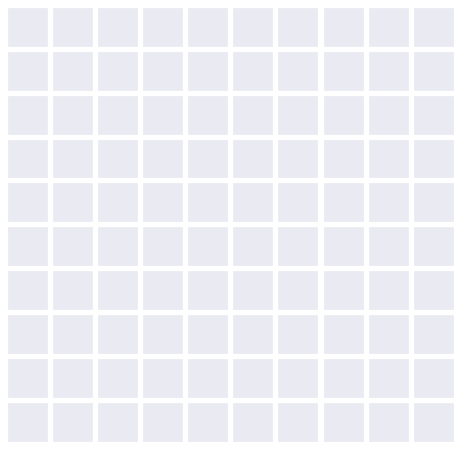

In [20]:
fig,axes=plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    


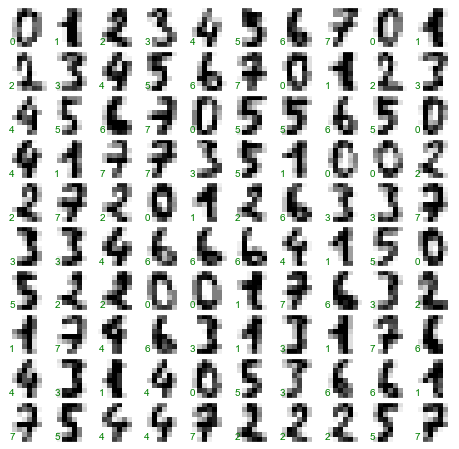

In [5]:
fig,axes=plt.subplots(10,10,figsize=(8,8),
                      subplot_kw={'xticks':[],'yticks':[]},
                      gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),
            transform=ax.transAxes,color='green')

In [56]:
X=digits.data
X.shape

(1797, 64)

In [55]:
y=digits.target
y.shape

(1797,)

In [58]:
from sklearn.manifold import Isomap
iso= Isomap(n_components=2)
iso.fit(digits.data)
data_projected=iso.transform(digits.data)
data_projected.shape

(1797, 2)

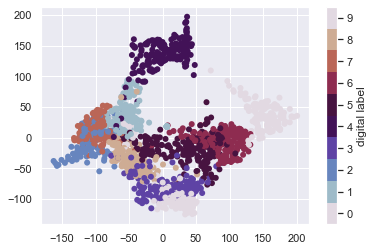

In [87]:
plt.scatter(data_projected[:,0],data_projected[:,1],c=y,edgecolor='none',alpha=1,
            cmap=plt.cm.get_cmap('twilight',10))
plt.colorbar(label='digital label',ticks=range(10))
plt.clim(-0.5,9.5)

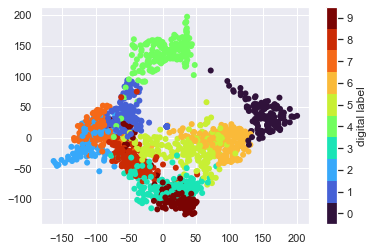

In [107]:
plt.scatter(data_projected[:,0],data_projected[:,1],c=y,edgecolor='none',alpha=1,
            cmap=plt.cm.get_cmap('turbo',10))
plt.colorbar(label='digital label',ticks=range(10))
plt.clim(-0.5,9.5)

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,t_test= train_test_split(X,y,test_size=0.33,random_state=41)

In [109]:
from sklearn.naive_bayes import GaussianNB 
model= GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [110]:
y_model= model.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(t_test,y_model)

0.8215488215488216

Text(89.18, 0.5, 'true_value')

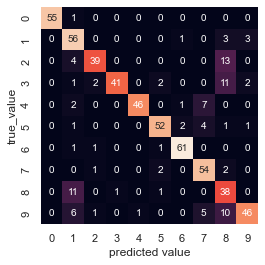

In [115]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(t_test,y_model)
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true_value')

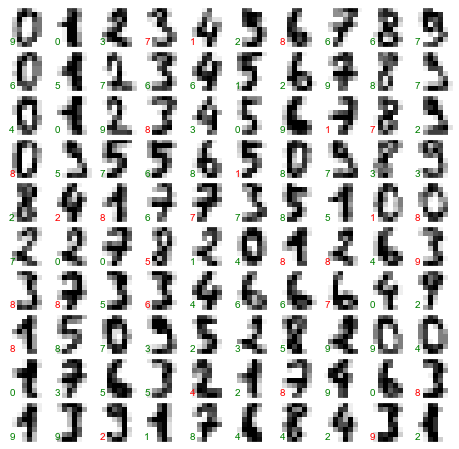

In [118]:
fig,axes=plt.subplots(10,10,figsize=(8,8),
                      subplot_kw={'xticks':[],'yticks':[]},
                      gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(y_model[i]),
            transform=ax.transAxes,color='green' if (y_model[i]==t_test[i]) else 'red')